In [1]:
import matplotlib.pyplot as plt
import pandas as pd
unames = [ 'name' , 'gender', 'birth']
years = range(1880, 2011)
pieces = []
for i in years:
    df = pd.read_table('yob%d.txt'%i, sep = ',', engine = 'python' , names = unames)
    df['year'] = i
    pieces.append(df)
    data = pd.concat(pieces, ignore_index = False)
   #задание 1

In [2]:
data['gender'].value_counts() #задание 2

F    1003985
M     686799
Name: gender, dtype: int64

In [3]:
print(data.groupby(by=['year','name','gender']).sum().groupby(level=[0]).cumsum())

                         birth
year name      gender         
1880 Aaron     M           102
     Ab        M           107
     Abbie     F           178
     Abbott    M           183
     Abby      F           189
...                        ...
2010 Zyron     M       3657366
     Zyshawn   M       3657375
     Zytavious M       3657381
     Zyyanna   F       3657387
     Zzyzx     M       3657392

[1690784 rows x 1 columns]


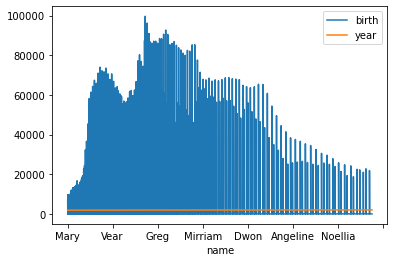

In [4]:
data.plot(x="name", y=["birth",'year','gender'])#задание 3
plt.show()

In [5]:
data['proportion']=None#задание 4
dataname=data.groupby('name').aggregate(sum)
dataname
data['index'] = data.index
amount=data['index'].sum()


In [6]:

proportion=data.copy()
proportion['proportion']=proportion['birth']/proportion['birth'].sum()
proportion


,name,gender,birth,year,proportion,index
0,Mary,F,7065,1880,2.191359e-05,0
1,Anna,F,2604,1880,8.076855e-06,1
2,Emma,F,2003,1880,6.212727e-06,2
3,Elizabeth,F,1939,1880,6.014217e-06,3
4,Minnie,F,1746,1880,5.415587e-06,4
...,...,...,...,...,...,...
33833,Zymaire,M,5,2010,1.550855e-08,33833
33834,Zyonne,M,5,2010,1.550855e-08,33834
33835,Zyquarius,M,5,2010,1.550855e-08,33835
33836,Zyran,M,5,2010,1.550855e-08,33836


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


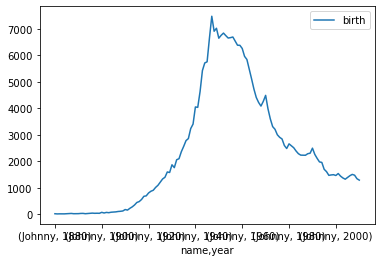

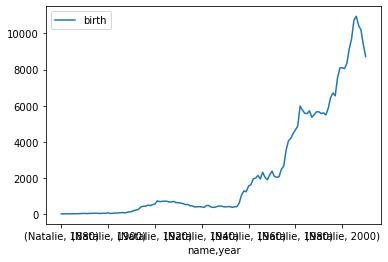

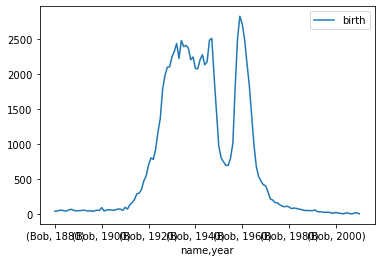

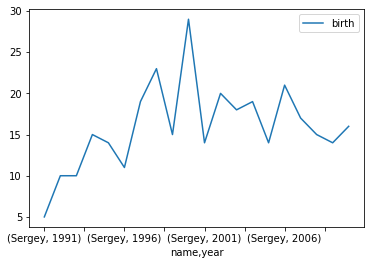

In [7]:
graph = pd.pivot_table(data, index = ['name','year'], values = ['birth'], aggfunc = 'sum')#задание 5
print(graph['Johnny':'Johnny'].plot(y = 'birth', use_index = True))
print(graph['Natalie':'Natalie'].plot(y = 'birth', use_index = True))
print(graph['Bob':'Bob'].plot(y = 'birth', use_index = True))
print(graph['Sergey':'Sergey'].plot(y = 'birth', use_index = True))


In [ ]:
for i in years:#задание 6
    df = pd.read_table('yob%d.txt'%i, sep = ',', engine = 'python' , names = unames)
    df['year'] = i
    pieces.append(df)
    data = pd.concat(pieces, ignore_index = True)
    df.sort_values(by='birth',ascending=False)
    df=df.head(1)
    df